In [ ]:
#

In [2]:
from pathlib import Path
import pandas as pd
import numpy as np 



CONTENT_DIR = Path.home() / 'Datasets' / 'unpackAI' / 'DL201-4.0' # 


# Section 2: Image Data for CV
<hr style="border:4px solid gray"> </hr>

SECTION GOALS AND OBJECTIVES 

## Step 1: Loading Image Data
<hr style="border:2px solid gray"> </hr>

As is always, the question becomes, how do we access our data.

How is it stored?

In general, most computer vision data sets are organized in two ways.

* As individual files 

* With Metadata (Tables which contain the information we need)

To do this, we are going to walk through a couple datasets


### Key Concept: File Paths

In [78]:
CONTENT_DIR

PosixPath('/home/jentlejames/Datasets/unpackAI/DL201-4.0')

### Case 1: Data points as Individual files
<hr style="border:1px solid gray"> </hr>

For this case, we are going to show how images are often organized 
:
in directories, and how we can extract our data.

As always, we need to be thinking about the following ideas 

* What are the potential target variables or labels?

* What are  the potentia feature variables in the dataset? How are they relevant?

* {{Continue to add more questions}}

#### Extracting Zip Files
<hr style="border:1px solid gray"> </hr>

Zip files are incredibly common in many areas.

For datasets, they serve two primary purposes

1. This format bundles together many files into one and makes it easier and faster to send it over the internet. Network protocols are similar to the mail. It's much less complicated to send a shipping container rather than do paperwork and handling of thousands of individual boxes.

2. Compression. The other problem is bandwidth. Zip files, along with other formats, can make files smaller which is beneficial because they take up less space on the hard drive. More importantly, this means that we can download the dataset faster. 



##### Step 1: Find the exact file path

In [79]:
# Setting the file path using pathlib

emotionsImagesZipPath = CONTENT_DIR /'opencv-emotion-images.zip'


##### Step 2: Unzip the files

In this code, we are using a library called shutil
Shutil is short for shell utility.

This allows python to make commands in the shell like we learned earlier.

In this case, we are telling it to unzip a file at location X and put it into location Y

In [1]:
# Unzipping Zip files in Python
import os
from shutil import unpack_archive

#unpack_archive(emotionsImagesZipPath, CONTENT_DIR)


##### Step 3: Check the file path



Now that we extracted the data, we now need to make sure that we know where our data is, and check up on it before proceeding to the next level.

Check the output of the next command and see what it is doing.

In [82]:
s.listdir(CONTENT_DIR)

['CV', 'NLP', 'bank_loan', 'zips', 'TAB', 'emotion-images']

The directory is called 'images'

This is not very clear, so we should rename it so that
our data never gets lost.

In [14]:
os.rename(CONTENT_DIR/ 'Images',CONTENT_DIR / 'emotion-images')

In [13]:
# Let's change the directory we are working in 
os.chdir(CONTENT_DIR/ 'emotion-images')

Now that we have unzipped our dataset, we can proceed to see 
what is inside of it. We should look for our labels first

#### Skill 1 : Extracting labels from Directory Names
<hr style="border:0.5px solid gray"> </hr>

The next thing we need to do is to find the labels in our dataset.

remember the y = mx + b example. We need to tell the AI model what the target for prediction will be.

In this case, the labels are organized as file paths. Let's take a look here.

##### Step 1: Find the root directory

File systems are often refered to as file trees. 

In [157]:


os.chdir(CONTENT_DIR / 'emotion-images')

In [158]:
Path.cwd()

PosixPath('/home/jentlejames/Datasets/unpackAI/DL201-3.0/emotion-images')

In [ ]:
os.chdir

In [15]:
print(Path.cwd())
print(os.listdir())

/home/jentlejames/Datasets/unpackAI/DL201-3.0/emotion-images
['validation', 'train']


In [16]:
os.chdir('train')

In [17]:
print(Path.cwd())
print(os.listdir())

/home/jentlejames/Datasets/unpackAI/DL201-3.0/emotion-images/train
['Fear', 'Angry', 'Neutral', 'Surprise', 'Happy', 'Sad', 'Disgust']


In [29]:
TRAIN_DIR = CONTENT_DIR/'emotion-images'/'train'

In [30]:
labels = os.listdir(TRAIN_DIR)

Now we have our labels. Let's look at them and decide what we can do now with them.

In [31]:
print(f'total number of labels: {len(labels)}')

total number of labels: 7


#### EDA: Extracting file paths for images

In [44]:
for label in os.listdir(TRAIN_DIR):
    imagesDirectory = TRAIN_DIR/label
    #print(directoryPath)
    
    images = os.listdir(imagesDirectory)
    for imageName in images:
        
        imagePath = imagesDirectory/imagesPath # makes a longer path
        
        
        imageName = imagePath 
    print(len(images))
    

4097
3995
4965
3171
7215
4830
436


In [56]:
root_dir = "/content/drive/MyDrive/Colab Data"
base_dir = root_dir + '/Tomato_Sample'

imagesDictionary = {}
for label in labels:
    classDir = TRAIN_DIR/label
    classImagePathsList = [classDir/ImageName for ImageName in os.listdir(classDir)]
    
    print(len(classImagePathsList))
    imagesDictionary[label] = classImagePathsList
print(imagesDictionary.keys())

4097
3995
4965
3171
7215
4830
436
dict_keys(['Fear', 'Angry', 'Neutral', 'Surprise', 'Happy', 'Sad', 'Disgust'])


In [55]:
imagesDictionary['Happy'][0]

PosixPath('/home/jentlejames/Datasets/unpackAI/DL201-3.0/emotion-images/train/Happy/5618.jpg')

#### Skill 1 : Extracting labels from File Names
<hr style="border:0.5px solid gray"> </hr>

In [20]:
#!pip install -Uqq fastbook
import fastbook
fastbook.setup_book

from fastbook import *


from fastai.data.external import URLs


In [23]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)

In [4]:
#hide
Path.BASE_PATH = path

In [24]:
path.ls()

(#2) [Path('/home/jentlejames/.fastai/data/oxford-iiit-pet/images'),Path('/home/jentlejames/.fastai/data/oxford-iiit-pet/annotations')]

We can see that this dataset provides us with *images* and *annotations* directories. The [website](https://www.robots.ox.ac.uk/~vgg/data/pets/) for the dataset tells us that the *annotations* directory contains information about where the pets are rather than what they are. In this chapter, we will be doing classification, not localization, which is to say that we care about what the pets are, not where they are. Therefore, we will ignore the *annotations* directory for now. So, let's have a look inside the *images* directory:

In [6]:
(path/"images").ls()

(#7393) [Path('images/Egyptian_Mau_33.jpg'),Path('images/english_setter_134.jpg'),Path('images/pug_99.jpg'),Path('images/staffordshire_bull_terrier_39.jpg'),Path('images/keeshond_27.jpg'),Path('images/shiba_inu_56.jpg'),Path('images/Sphynx_156.jpg'),Path('images/Ragdoll_74.jpg'),Path('images/american_pit_bull_terrier_18.jpg'),Path('images/Abyssinian_65.jpg')...]

Most functions and methods in fastai that return a collection use a class called `L`. `L` can be thought of as an enhanced version of the ordinary Python `list` type, with added conveniences for common operations. For instance, when we display an object of this class in a notebook it appears in the format shown there. The first thing that is shown is the number of items in the collection, prefixed with a `#`. You'll also see in the preceding output that the list is suffixed with an ellipsis. This means that only the first few items are displayed—which is a good thing, because we would not want more than 7,000 filenames on our screen!

By examining these filenames, we can see how they appear to be structured. Each filename contains the pet breed, and then an underscore (`_`), a number, and finally the file extension. We need to create a piece of code that extracts the breed from a single `Path`. Jupyter notebooks make this easy, because we can gradually build up something that works, and then use it for the entire dataset. We do have to be careful to not make too many assumptions at this point. For instance, if you look carefully you may notice that some of the pet breeds contain multiple words, so we cannot simply break at the first `_` character that we find. To allow us to test our code, let's pick out one of these filenames:

In [26]:
fname = (path/"images").ls()[0]

The most powerful and flexible way to extract information from strings like this is to use a *regular expression*, also known as a *regex*. A regular expression is a special string, written in the regular expression language, which specifies a general rule for deciding if another string passes a test (i.e., "matches" the regular expression), and also possibly for plucking a particular part or parts out of that other string. 

In this case, we need a regular expression that extracts the pet breed from the filename.

We do not have the space to give you a complete regular expression tutorial here, but there are many excellent ones online and we know that many of you will already be familiar with this wonderful tool. If you're not, that is totally fine—this is a great opportunity for you to rectify that! We find that regular expressions are one of the most useful tools in our programming toolkit, and many of our students tell us that this is one of the things they are most excited to learn about. So head over to Google and search for "regular expressions tutorial" now, and then come back here after you've had a good look around. The [book's website](https://book.fast.ai/) also provides a list of our favorites.

> a: Not only are regular expressions dead handy, but they also have interesting roots. They are "regular" because they were originally examples of a "regular" language, the lowest rung within the Chomsky hierarchy, a grammar classification developed by linguist Noam Chomsky, who also wrote _Syntactic Structures_, the pioneering work searching for the formal grammar underlying human language. This is one of the charms of computing: it may be that the hammer you reach for every day in fact came from a spaceship.

When you are writing a regular expression, the best way to start is just to try it against one example at first. Let's use the `findall` method to try a regular expression against the filename of the `fname` object:

In [82]:
# In this, it is looking for any characters which preceed an underscore with
# only digits and then a .jpg extension 
# The $ sign means that it is at the end of  the file

re.findall(r'(.+)_\d+.jpg$', fname.name)

['Egyptian_Mau']

This regular expression plucks out all the characters leading up to the last underscore character, as long as the subsequence characters are numerical digits and then the JPEG file extension.

Now that we confirmed the regular expression works for the example, let's use it to label the whole dataset. fastai comes with many classes to help with labeling. For labeling with regular expressions, we can use the `RegexLabeller` class. In this example we use the data block API we saw in <<chapter_production>> (in fact, we nearly always use the data block API—it's so much more flexible than the simple factory methods we saw in <<chapter_intro>>):

In [ ]:
r'(.+)_\d+.jpg$')

In [81]:
files = (path/"images").ls()
labels = []
for imgPath in files:
    # print(type(img))
    imgPath = str(imgPath)
    
    try:
        dogBreed = re.search('/(.+)_\d+.jpg$',imgPath)[1]
    except:
        pass
    label = dogBreed.split('/')[-1]
    #print(label)
    labels.append(label)
    
# Checking the length
print(len(files))
print(len(labels))

7393
7393


### Example 3: A table of URLs
<hr style="border:1px solid gray"> </hr>

It is also possible to  get the label and path information in a CSV file.

In this case, the label extraction can be done using Pandas 


Type 3: A csv of labels and URLs

This is a google landmarks image dataset, it contains lots of information on different photos that users have uploaded along with different kinds of metadata.

However, the  dataset is quite large, so it makes more sense to download the paths individually

These  metadata files contain the urls to the images that we will eventually ne


##### ETL 

Step 1, identifying the x and the y 

Features in this case are the images

Labels in this case are the  landmark IDs

Now, we need to get these two

In [109]:
# Type of computer vision datasets 
import os 

googleLandmarksPath = '/home/jentlejames/Datasets/Google-Landmarks/'

for dirname, _, filenames in os.walk(googleLandmarksPath):
    for filename in filenames: 
        print(filename)
        filepath = os.path.join(dirname,filename)
        filename = filename.split('.')[0]

        exec(f"{filename} = pd.read_csv('{filepath}')")


recognition_solution.csv
train.csv
retrieval_solution.csv
boxes_split2.csv
index.csv
test.csv
boxes_split1.csv


### Let's take a look at everything in our dataset using.head() and printing the shape

We want to know  the shape, because as we learned in the last lesson, shape is very important.

If we check the ratios of the shape and we find relationships, we can confirm that we have what we need



In [118]:
# Recognition Solution

print(recognition_solution.shape)
recognition_solution.head(3)

(117703, 3)


,id,landmarks,Usage
0,b8a5057fdc51fb0a,NaN,Private
1,a0ae5b40187f3e6e,NaN,Public
2,8102cf887daa75b9,NaN,Public


### Looking at the test and training data

### let's look at the relationship between them

In [119]:
# Train

print(train.shape)
train.head(3)

(1225029, 3)


,id,url,landmark_id
0,97c0a12e07ae8dd5,http://lh4.ggpht.com/-f8xYA5l4apw/RSziSQVaABI/...,6347
1,650c989dd3493748,https://lh5.googleusercontent.com/-PUnMrX7oOyA...,12519
2,05e63ca9b2cde1f4,http://mw2.google.com/mw-panoramio/photos/medi...,264


In [124]:
# test set

print(test.shape)
test.head()

(117703, 2)


,id,url
0,cb9998b8cdaf6235,https://lh3.googleusercontent.com/-q8B91vDIQZY...
1,30728cf6e50a6bc6,https://lh3.googleusercontent.com/-91gJSKTgv5Q...
2,16afbc86b710337d,https://lh3.googleusercontent.com/-GHZdXuf2wMg...
3,d29b2166cf522450,https://lh3.googleusercontent.com/-cWDnYNQhyws...
4,dd5c03b20c21cfba,https://lh3.googleusercontent.com/-PSLN6BloM-k...


In [129]:
print('test to train ratio is:')
print(f'{train.shape[0] / test.shape[0]} to 1')

test to train ratio is:
10.407797592244888 to 1


### Now let's look at retrieval solution and use our intuition to see what it means

In [130]:
# retrieval solution

print(retrieval_solution.shape)
retrieval_solution.head(3)

(117703, 3)


,id,images,Usage
0,97a902dee49b61b4,None,Ignored
1,14289cc41c49feb0,None,Ignored
2,ccb0a36d5377d303,None,Ignored


It seems like there are two new categories, images and usage

let's see what is inside of them in 



In [132]:

retrieval_solution.Usage.value_counts()

Ignored    116984
Private       483
Public        236
Name: Usage, dtype: int64

This  likely means that some of the images will not be downloadable because they are private. In this case, we have have to drop these images from the dataset

In [84]:
# Here it seems that there are 445 unique entries for this category

len(retrieval_solution.images.unique())

## Step 3: EDA Exploring Image Datasets
<hr style="border:2px solid gray"> </hr>

Now that we have the image paths which tell us exactly where our data is, we can now explore them. 

### Example 1: Displaying images in Jupyter Notebook
<hr style="border:1px solid gray"> </hr>

In [57]:
from unpackai.utils import clean_error_img


### Example 2: Checking for corrupted images

In [58]:
from unpackai.utils import clean_error_img


# This line checks for corrupted images
clean_error_img(TRAIN_DIR)

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/4097 [00:00<?, ?it/s]

  0%|          | 0/3995 [00:00<?, ?it/s]

  0%|          | 0/4965 [00:00<?, ?it/s]

  0%|          | 0/3171 [00:00<?, ?it/s]

  0%|          | 0/7215 [00:00<?, ?it/s]

  0%|          | 0/4830 [00:00<?, ?it/s]

  0%|          | 0/436 [00:00<?, ?it/s]

### Example 3: Examining Metadata for Features and Labels 

Now that we have looked at the metadata here, let's extract the features and the labels. 

The key features in this are going to be the file paths, becuase it is going to allow us access to the photos so, we can download them from google's servers.

This will be in the csv file for us to extract.

The labels in this case are going to be the landmark_IDs. This will be key to our data analysis approach. 

If we are doing image segmentation we can also extract the box labels that will tell our data where the landmarks are located in the photos. 



#### File Paths

#### Text Labels

 Out of this, we need to find the label, and where the feature is located

 In my opinion, the landmark_ID is a potential target, along with the boxes if it becomes an image segmentation problem

 

 Let's learn more about the landmark_ID

In [152]:
train.head(5)

,id,url,landmark_id
0,97c0a12e07ae8dd5,http://lh4.ggpht.com/-f8xYA5l4apw/RSziSQVaABI/...,6347
1,650c989dd3493748,https://lh5.googleusercontent.com/-PUnMrX7oOyA...,12519
2,05e63ca9b2cde1f4,http://mw2.google.com/mw-panoramio/photos/medi...,264
3,08672eddcb2b7c93,http://lh3.ggpht.com/-9fgSxDYwhHA/SMvGEoltKTI/...,13287
4,fc49cb32ef7f1e89,http://lh6.ggpht.com/-UGAXxvPbr98/S-jGZbyMIPI/...,4018


In [155]:
print('total of unique images in train set')
print(len(train.landmark_id.unique()))
#len(train.landmark_id.unique())

total of unique images in train set
14945


In [175]:
# Looking at the landmark IDs
landmarkIDs = pd.Series(train.landmark_id.value_counts())
train.landmark_id.value_counts()

None     70827
9633     48550
6051     47825
6599     21777
9779     17601
         ...  
4639         1
4608         1
11974        1
6069         1
7977         1
Name: landmark_id, Length: 14945, dtype: int64

In [184]:
mlandmarkIDs.iloc[0:9].to_numpy() # Here is our numpy array which allows us to pass data to different libraries


array([70827, 48550, 47825, 21777, 17601, 12742, 10302,  8950,  8893])

In [188]:
# Plot the most frequent landmark_ids

mostPhotographedLandmarks = landmarkIDs.to_numpy()

from matplotlib import pyplot as plt
import seaborn as sns



# Occurance of landmark_id in decreasing order(Top categories)
mostPhotographedLandmarks = pd.DataFrame(train.landmark_id.value_counts().head(8))
mostPhotographedLandmarks.reset_index(inplace=True)
mostPhotographedLandmarks.columns = ['landmark_id','count']
mostPhotographedLandmarks




,landmark_id,count
0,None,70827
1,9633,48550
2,6051,47825
3,6599,21777
4,9779,17601
5,2061,12742
6,5554,10302
7,6651,8950


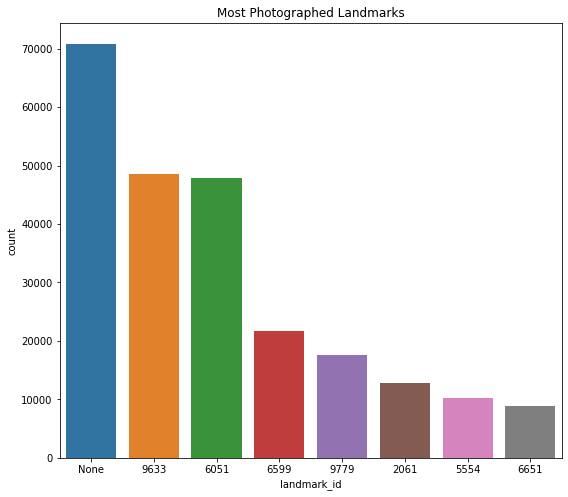

In [192]:
plt.figure(figsize = (9, 8))
plt.title('Most Photographed Landmarks')
sns.barplot(x="landmark_id", y="count", data=mostPhotographedLandmarks,
            label="Count")
plt.show()

This shows us an interesting part of the data, that the most common landmarkID is none

This shows that it has no label and needs to be removed



In [196]:
# Checking f
print('checking the length before removing these from our dataset')
len(train) - len(train[train['landmark_id'] != 'None']) 

checking the length before removing these from our dataset


70827

In [202]:
train

,id,url,landmark_id
0,97c0a12e07ae8dd5,http://lh4.ggpht.com/-f8xYA5l4apw/RSziSQVaABI/...,6347
1,650c989dd3493748,https://lh5.googleusercontent.com/-PUnMrX7oOyA...,12519
2,05e63ca9b2cde1f4,http://mw2.google.com/mw-panoramio/photos/medi...,264
3,08672eddcb2b7c93,http://lh3.ggpht.com/-9fgSxDYwhHA/SMvGEoltKTI/...,13287
4,fc49cb32ef7f1e89,http://lh6.ggpht.com/-UGAXxvPbr98/S-jGZbyMIPI/...,4018
...,...,...,...
1225024,4bb5a501e5b26a6a,https://lh6.googleusercontent.com/-mRrQU3t5cYw...,9737
1225025,2cd8a404796cfe0e,https://lh6.googleusercontent.com/-0UB5gFx6w7M...,7758
1225026,8733b8b469fb8c1b,http://lh3.ggpht.com/-TDQWNVvJQDI/SI3HZSA4D3I/...,13170
1225027,14dd9e8790397c83,https://lh4.googleusercontent.com/-anV4Xpo0UuM...,5669


In [201]:
# Here we are going to do an indexing of our data 
# in order to filter it, this selects the index where None is not included

train = train[train['landmark_id'] != 'None']

In [204]:
# checking if our operation was completed 

train[train['landmark_id'] == 'None']
#Nothing should show up

,id,url,landmark_id


#### Boxes (Image Segmentation)

Boxes labels

 it appears that some of the images have boxes labeled

This would be useful if we are trying to do image segmentation



In [121]:
# Boxes Split 1 

print(boxes_split1.shape)
boxes_split1.head(3)

(53755, 2)


,id,box
0,03b4355b047c94b4,0.12 0.16 0.74 1.00
1,435986fb31b5f4f3,0.37 0.35 0.52 0.40
2,a8e1490b5f8d37e2,0.22 0.00 0.87 1.00


12.76048697187598 % are labeled with boxes


In [ ]:
# Boxes Split 2

print(boxes_split2.shape)
boxes_split2.head(3)

(32328, 2)


,id,box
0,eabff78ee97cf8df,0.00 0.00 0.79 0.95
1,654a08dff4f19f5b,0.00 0.04 0.96 1.00
2,6228cc96dc5b4def,0.00 0.23 0.75 0.76


In [ ]:

print(f'{(index.shape[0] / (boxes_split1.shape[0] + boxes_split2.shape[0]))} % are labeled with boxes' )


In [ ]:
# index 
print(index.shape)
index.head(3)

(1098461, 2)


,id,url
0,e08bbc99a449d6e6,http://lh3.ggpht.com/-0syNYGY8KGI/TM3Y0kKbgDI/...
1,d8adc613d77254d5,https://lh3.googleusercontent.com/-gvOm8lpizSQ...
2,bb4a99310d191a7a,http://lh5.ggpht.com/-2NdVC7qAtk4/SC9AW2SGWqI/...


 Out of this, we need to find the label, and where the feature is located

 In my opinion, the landmark_ID is a potential target, along with the boxes if it becomes an image segmentation problem



Let's learn more about the landmark_ID by downloading a small sample of images that we can use to know more about the data we are using.

## Exploring the Data using a model

Due to many advancements in deep learning, it has become much easier for us to be able to use tools people have created to inform the rest of our development process. In this case, we can put our data into a model to see how well it performs and what we need to do in order to make it better during the rest of our project.

This will help us to iterate faster and make sure that our efforts are on right mark moving forward. This can save us a lot of time. 

In [ ]:
# Imports

import fastbook
fastbook.setup_book()

#hide
from fastbook import *

from fastbook import *
from fastai.vision.widgets import *



### Loading the Data

If our data is stored in google colab we can use the following code as a template to  upload it.

The goal here is to get the file paths or our x variable (which is the images)

along with the y variable which is the lable contained in the path

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [85]:
BASE_DIR = 'content/drive/MyDrive/{{{YOUR DATA DIRECTORY HERE}}'



### Obtaining the Labels/Classes

The next thing that you can do is know what classes you will be using, along with the individual file paths to each image. 



In [ ]:
# Get the directory which everything is stored in

BASE_DIR = 

### Dataloader

Once we have our images in a path, we can use a dataloader to preprocess and transform the data automatically for us using FastAI

In [86]:
class DataLoaders(GetAttr):
  def __init__(self, *loaders): self.loaders = loaders
  def __getitem__(self, i): return self.loaders[i]
  train,valid = add_props(lambda i, self: self[i])

In [ ]:
data = DataBlock (
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=99),
    get_y=parent_label,
    item_tfms=Resize(225,225)
    )

In [88]:
data = data.new(
    item_tfms=RandomResizedCrop(28, min_scale=0.5),
    batch_tfms=aug_transforms()
)

In [ ]:
dls = EEGs.dataloaders(BASE_DIR)

### Training the Model

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

### Interpreting the Model

In [90]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_top_losses(15)


In [ ]:
interp.print_classification_report()

In [ ]:
interp.most_confused()

### Human in the Loop: 

Here, we can find what we have with the raw data and decide how we can improve it. The essence of Open Source is for people to share tools that will allow people to reach  greater highs than if they had to do everything from scratch. 

Where does the model perform well? How does it perform poorly? How can it be improved?

Is this dataset suitable for what you are trying to learn and accomplish?
